# Постановка задачи регрессии

Регрессия - задача машинного обучения, которая представляет собой предсказание некоторого вещественного показателя. Есть некоторый набор объектов, у них есть какие-то признаки, и мы хотим предсказать вещественный показатель для этих объектов. 

Задачи регрессии — это задачи машинного обучения при использовании числового целевого столбца.

## Метрики задачи регрессии
- **MAE** — Mean Absolute Error (средняя абсолютная ошибка)
- **MSE** — Mean Squared Error (среднеквадратичная ошибка)
- **RMSE** — Root Mean Squared Error (корень из среднеквадратичной ошибки)
- **MAPE** — Mean Absolute Percentage Error (средняя абсолютная процентная ошибка)
- **R2** — Коэффициент детерминации

In [255]:
import numpy as np
from sklearn import metrics

Задаем два сэмпла для примера:
- **y** - целевая переменная (вещественная), абстрактный показатель
- **y_pred** - искуственные предсказания нашей моели (в сэмпле специально близки к исходным значениям y, но немного отстают)

In [62]:
y = np.array([100, 150, 115, 125])
y_pred = np.array([96, 143, 120, 120])

**MAE** - средняя абсолютная разница между предсказаниями и целевой переменной. Берем модуль разницы между y и y_pred, и затем среднее от него.  

In [63]:
# MAE
metrics.mean_absolute_error(y, y_pred)

np.float64(5.25)

In [64]:
np.abs(y - y_pred).sum() / len(y)

np.float64(5.25)

**MSE** - вычисляется аналогично, только вместо модуля берется квадрат разницы y и y_pred.
Используется чаще, чем MAE, так как чем больше ошибка, тем больше функция штрафует: значения квадратов будут возрастать. 

In [54]:
# MSE
metrics.mean_squared_error(y, y_pred)

np.float64(28.75)

In [55]:
((y - y_pred) ** 2).sum() / len(y)

np.float64(28.75)

**RMSE** - то же, что и MSE, только с добавлениям корня из квадрата разности y и y_pred.

In [56]:
# RMSE
metrics.root_mean_squared_error(y, y_pred)

np.float64(5.361902647381804)

In [57]:
np.sqrt(((y - y_pred) ** 2).sum() / len(y))

np.float64(5.361902647381804)

**R2** - коэффициент детерминации, который показывает, насколько хорошо мы предсказываем значения.
Чем ближе R2 к 1, тем лучше работает модель: выдает более определенные значения и регрессия происходит лучше. 
Значения R2 могут быть отрицательными. 

R2 используется чаще, так как результаты MSE и MAE сложно интерпретируемы. Значения MSE при больших значениях y и y_pred могут быть очень большими, отсюда абсолютная ошибка может быть равна сотням. 

In [58]:
# R2
metrics.r2_score(y, y_pred)

0.9132075471698113

### Формула для расчета R2
Из 1 вычитается дробь:
- в числителе сумма квадратов разницы между y и y_pred
- в знаменателе то же самое, только разница между y и средним по y

In [59]:
1 - (((y_pred - y) ** 2).sum() / ((y - y.mean()) ** 2).sum())

np.float64(0.9132075471698113)

Числитель и знаменатель можно поделить на n (длину y) - вместо sum() берем mean().
Ответ не поменяется, но станет понятно, что в числителе берется MSE между y и y_pred, в знаменателе - MSE между y и средним по y. 

In [71]:
1 - (((y_pred - y) ** 2).mean() / ((y - y.mean()) ** 2).mean())

np.float64(0.9132075471698113)

# Постановка задачи классификации
В отличие от задачи регрессии, предполагает предсказание некоторых классов для объектов. Пытаемся разделить объекты на заранее известные категории и предсказать для каждого объекта, к какому классу он принадлежит.

### Виды классификаций:
- **бинарные** - два класса объектов
- **мультиклассовые** - множество классов объектов

## Метрики задачи классификации:
- **Accuracy** - точность, аккуратность
- **Precision** - точность
- **Recall** - полнота
- **F1 score** - метрика, которая объединяет Precision и Precision
- **ROC-AUC** - площадь под ROC-кривой

Создаем две искусственные выборки, в которых есть классы 1 и 0. Предсказания иногда могут выводиться моделями не как классы, а как вещественные вероятности, которые довольно просто преобразовать в классы:
- если вероятность **> 0,5** - относим к классу 1
- если вероятность **<0,5** - относим к классу 0 

In [72]:
y = np.array([1, 0, 1, 1, 1, 0, 0])
y_pred = np.array([0, 0, 1, 1, 1, 1, 1])

**Accuracy** - количество правильно угаданных объектов. В примере всего 7 объектов, из них мы правильно угадали 4 из 7.

In [73]:
# Accuracy
metrics.accuracy_score(y, y_pred)

0.5714285714285714

Через numpy метрику Accuracy можно посчитать сравнением y и y_pred и затем его усреднением. 

In [74]:
(y == y_pred).mean()

np.float64(0.5714285714285714)

На картинке изображено все множество объектов:
- **слева** - объекты класса 1
- **справа** - объекты класса 0
В круг обведены предсказанные моделью 1.

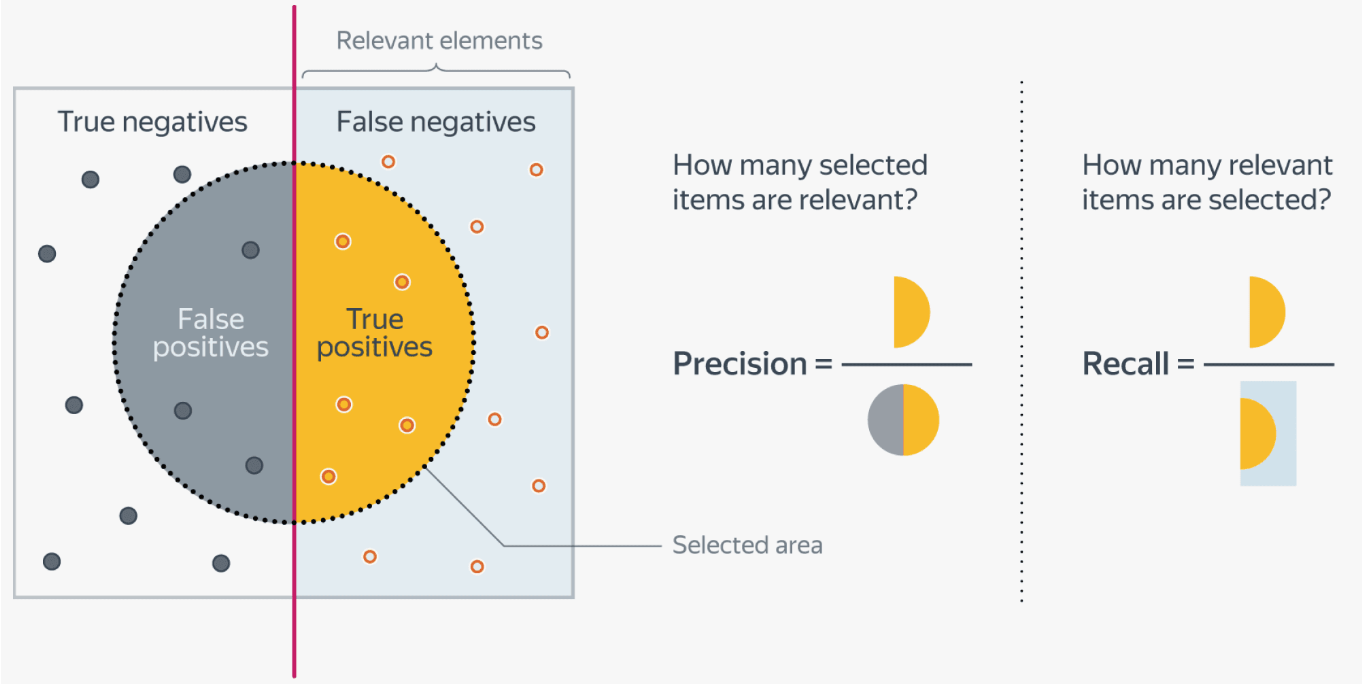

- **true positives** - случаи, когда модель выдала 1, и это действительно 1 (правильно угадала объект)
- **false positives** - случаи, когда модель выдала 1, но объект не является 1 (модель ошибается)
- **false negatives** - случаи, когда модель выдала 0, но объект является 1 (не смогла распознать положительный объект)
- **true negatives** - случаи, когда модель правильно не распознала отрицательный объект (на 0 выдала 0) 

**Precision** - отношение правильно угаданных моделью объектов ко всем объектам, к которым модель выдала 1. 

In [75]:
# Precision
metrics.precision_score(y, y_pred)

np.float64(0.6)

In [76]:
tp = ((y == 1) & (y_pred == 1)).sum() # true positive
fp = ((y == 0) & (y_pred == 1)).sum() # false positive
fn = y.sum() # false negative

In [77]:
precision = tp / (tp + fp)
precision

np.float64(0.6)

**Recall** - количество правильно найденных объектов из всех положительных. Есть единичные объекты и смотрим, какое количество из них модель правильно распознала. 

In [19]:
# Recall
metrics.recall_score(y, y_pred)

np.float64(0.75)

In [20]:
recall = tp / fn
recall

np.float64(0.75)

Метрики Precision и Recall плохо работают при дисбалансе классов. По-отдельности они не очень хорошо могут оценить качество модели. Например, есть 1000 человек, половина из них больны. Модель пытается классифицировать больных и выдает значение 1 только для 5 человек, которые действительно больны. В этом случае у нас не будет false positives, а только true positives, так как модель правильно предсказывает эти 5 человек. Тогда Precision будет равен 1, так как модель правильно выдала эти 5 человек. 

Для решения этой проблемы есть метрика F1 score, которая используется чаще, чем Precision и Recall, так как лучше показывает качество модели.

**F1 score** - гармоническое среднее между Precision и Recall. Вычисляется, как деление произведения Precision и Recall на их сумму, умноженное на 2. 

In [21]:
# F1
metrics.f1_score(y, y_pred)

np.float64(0.6666666666666666)

In [22]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

np.float64(0.6666666666666665)

### ROC-кривая
- **диагональная средняя линия** (красная) - абсолютно случайный классификатор

Например, предсказание с вероятностью 50% при подбрасывании монетки.
- **кривая** (синяя) - чем она ближе к верхнему левому углу, тем лучше

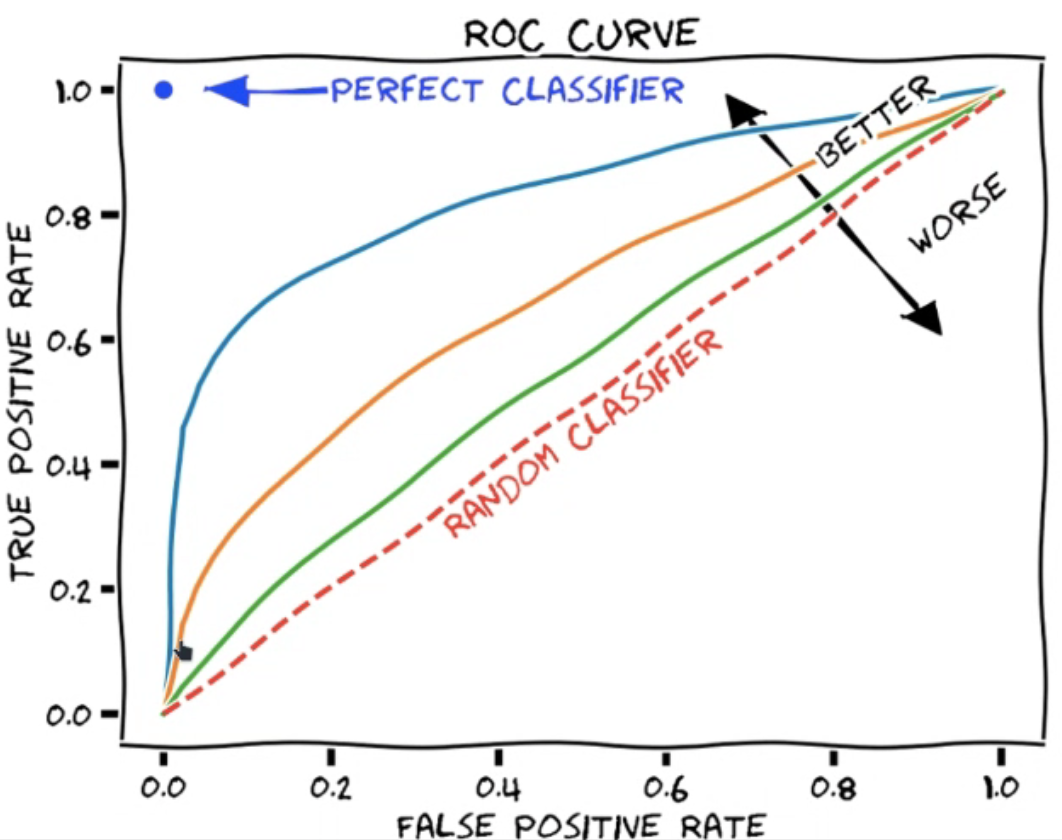

Совсем идеальных классификаторов не бывает. Если кривая ниже диагональной средней линии - это странный классификатор, который путает классы и предсказывает все наоборот (для 0 предсказывает 1 и для 1 - 0).  

Если нарисовать ROC-кривые для нескольких классификаторов, можно наглядно их сравнить и определить лучший. 

**ROC-AUC** - площадь под этой ROC-кривой. 
- для рандомного классификатора метрика ROC-AUC будет равна 0,5
- для идеального классификатора метрика ROC-AUC будет равна 1

Оптимальное значение ROC-AUC - от **0,5 до 1**. Если значение ROC-AUC < 0,5, это странная ситуация.  

**Пример** - есть 4 объекта, классы 1 и 0 и предсказание модели. 

In [80]:
y = np.array([1, 0, 1, 0])
y_pred = np.array([0, 0, 1, 0])

In [81]:
# ROC-AUC
metrics.roc_auc_score(y, y_pred)

np.float64(0.75)

### Построение ROC-кривой
Сначала надо отсортировать объекты по предсказаниям классификатора. То есть первыми идут значения, для которых y_pred = 1 (y в том же порядке, соответствуют y_pred).

Далее рисуем сетку, где: 
- единичный квадрат - каждая сторона квадрата равна 1
- делим стороны на несколько частей (m*n), где по вертикали (m) число 1, а по горизонтали (n) число 0.

Стартуем из точки (0,0). Конечная точка нашего маршрута – точка (1,1).
- если значение равно **1** - делаем шаг **вверх**
- если значение равно **0** – делаем шаг **вправо**

Если у нескольких объектов значения предсказаний равны, а y различны, делаем ход "по диагонали".

Если построить кривую по этому алгоритму, то для нашего примера получим:
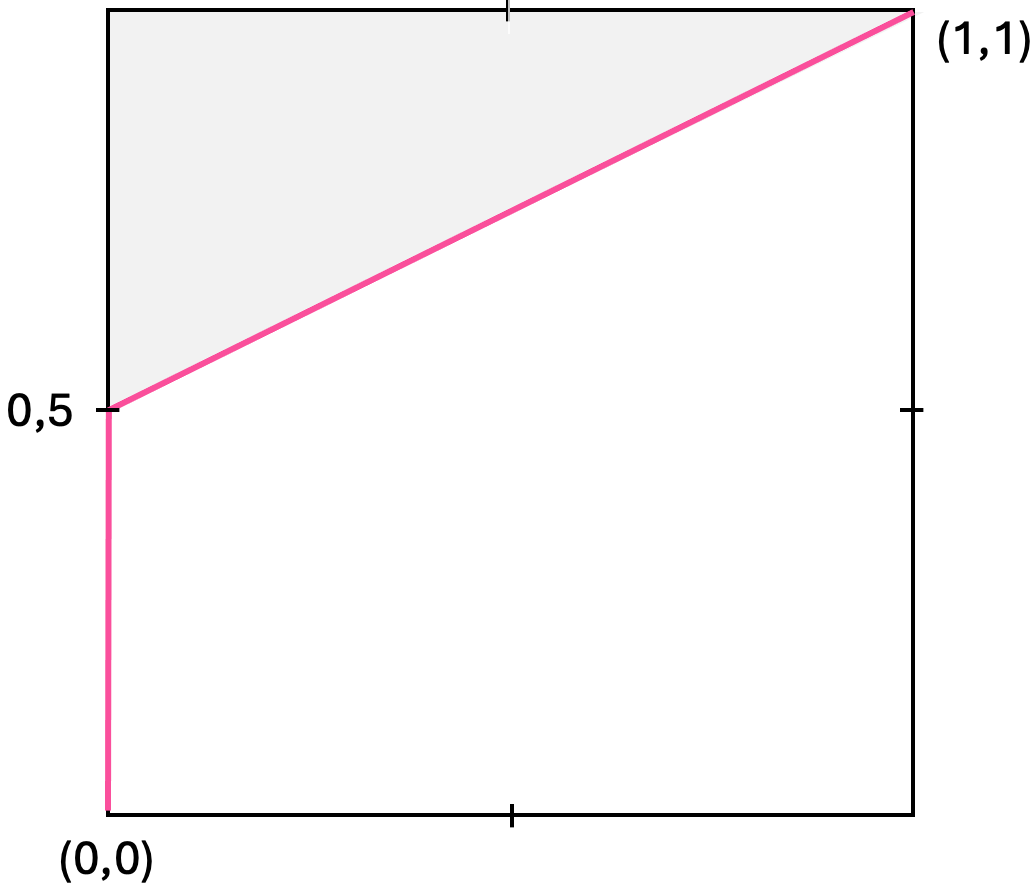

In [82]:
print(y_pred, y, sep="\n")

[0 0 1 0]
[1 0 1 0]


In [83]:
y = np.array([1, 1, 0, 0])
y_pred = np.array([1, 0, 0, 0])
print(y, y_pred, sep="\n")

[1 1 0 0]
[1 0 0 0]


Один катет прямоугольника равен 1, второй - 0,5. Тогда площадь треугольника равна 0,25. Так как площадь всего квадрата равна 1, то площадь под треугольником будет равна 1 - 0,25 = 0,75. Это и есть значение ROC-AUC.  

In [27]:
1 - 0.5 / 2

0.75

In [28]:
y = np.array([1, 0, 0, 0])
y_pred = np.array([0, 1, 0, 0])
print(y, y_pred, sep="\n")

[1 0 0 0]
[0 1 0 0]


# Алгоритм KNN 
Алгоритм **k-ближайших** соседей  Есть исходные объекты, для которых мы значем классы. Есть объекты, которые мы хотим классифицировать (предсказать для них классы).  

Метод основывается на поиске ближайших для объектов из обучающей выборки. Если объект похож на какое-то количество других, то у него такой же класс. Количество ближайших - гиперпараметр нашего алгоритма. Его можно перебирать, чтобы достичь какого-то качества. В зависимости от данных этот параметр может меняться, поэтому его надо подбирать. 

Для двумерного случая (когда есть два признака) видно как меняется разделяющая поверность при изменении этого параметра.
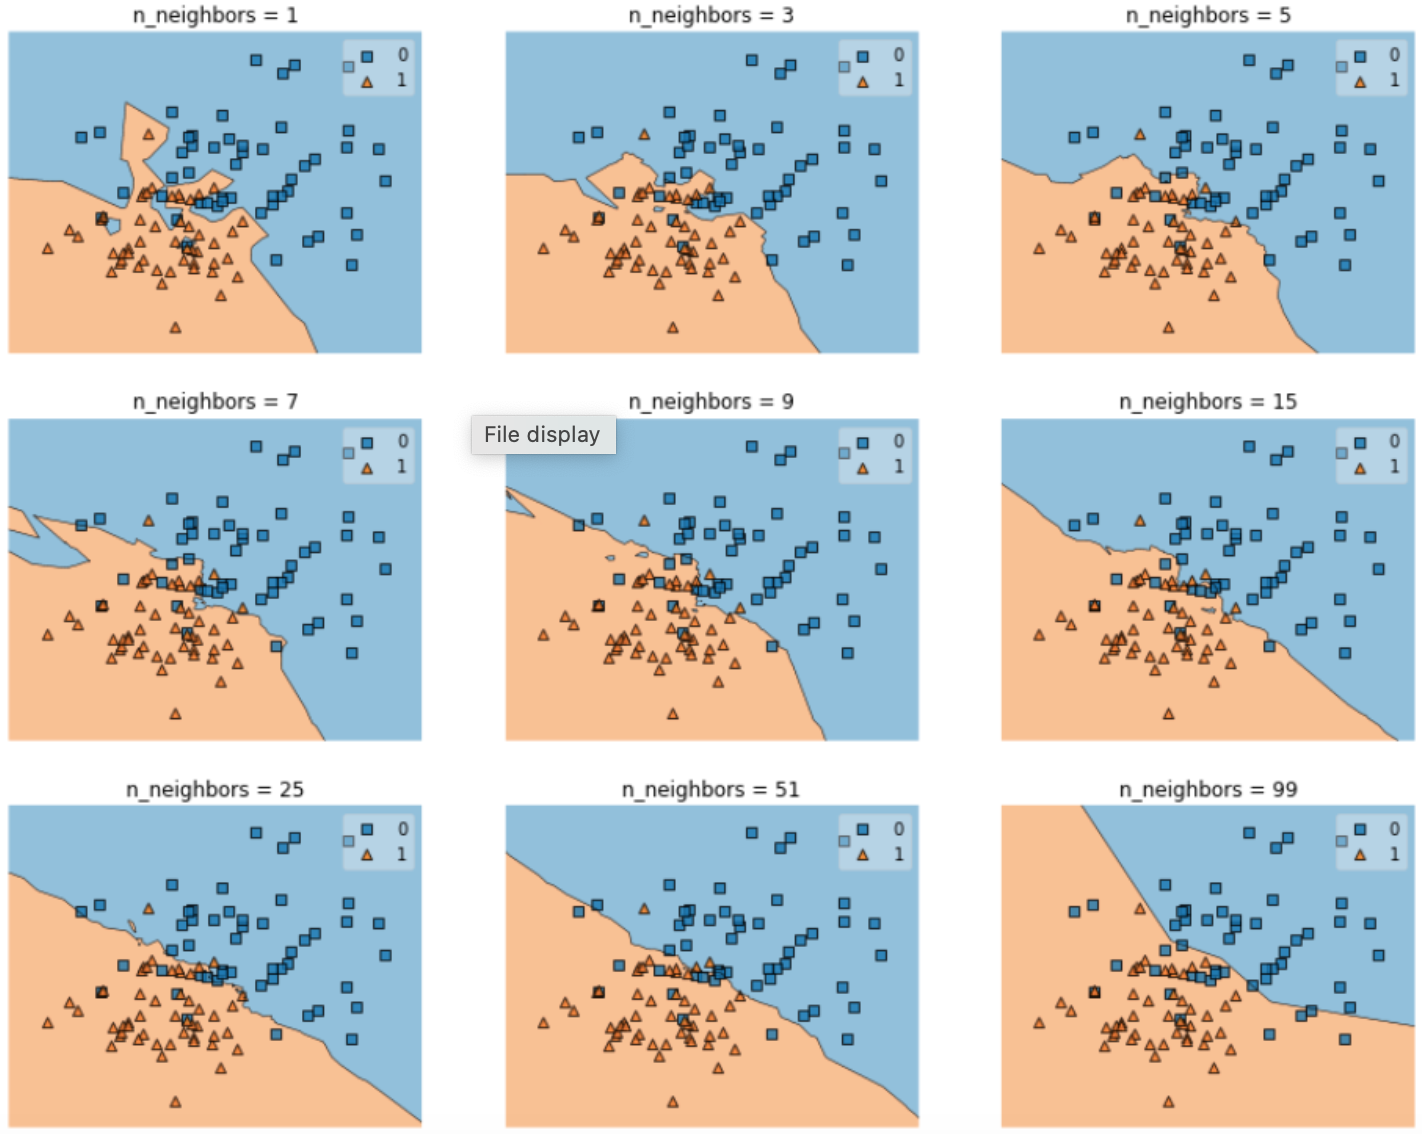

In [126]:
from sklearn.datasets import load_breast_cancer

Датасет по больным раком содержит пример бинарной классификации. 

In [202]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

**data** (переменная Х) - признаки. Есть 569 объектов, и для каждого объекта 30 численных признаков.

In [203]:
data['data'].shape

(569, 30)

**target** (переменная У) - показатель того, болен человек или нет. 

In [204]:
X, y = data['data'], data['target']

In [205]:
from sklearn.model_selection import train_test_split

Делим выборку на обучающую и тестовую случайным образом, на выходе получаем split для Х и у. Берем 1/4 выборки как тестовую.

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [207]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [208]:
from sklearn.neighbors import KNeighborsClassifier

Смотрим дефолтные аргументы функции KNeighborsClassifier, только меняем количество k-ближайших соседей на 3.

In [209]:
model = KNeighborsClassifier(n_neighbors=3)

Все модели в sklearn имеют достаточно простой интерфейс:
- **fit** - обучает алгоритм или модель
- **predict** - предсказывает классы 

In [210]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [215]:
preds = model.predict(X_test)
preds

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

Можно попросить выдавать не классы, а вероятности. Для 143 объектов модель выдает 2 класса - 0 и 1. 

In [226]:
model.predict_proba(X_test).shape

(143, 2)

In [227]:
model.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.

Смотрим на качество модели по метрике F1. В итоге получилось высокое качество модели. 

In [228]:
metrics.f1_score(y_test, preds)

np.float64(0.9508196721311475)

## Реализация классификатора 
Есть метод fit и predict. При создании объекта (**init**) берем целочисленное количество k-ближайших соседей, равное 3. 

Обычный KNN по-сути никак не обучается (**fit**). На этом этапе мы запоминаем массивы X_train и y_train.

В предсказании (**predict**) надо посчитать для каждого объекта в test расстояние до объекта в train. Это базовый вариант (Bruteforce) - перебор всех вариантов. 

Есть  переменные X и y, две координаты (x0, y0) и (x1, x1). **Евклидово расстояние** - квадрат из суммы квадратов разниц между координатами.

In [ ]:
np.sqrt((x0 - x1) ** 2 + (y0 - y1) ** 2)

В **многомерном** пространстве евклидово расстояние находится проще - разница между X и y. Вычитание происходит поэллементно и в результате получается вектор размерностью 30 (как и количество признаков). Возведение вектора в квадрат также происходит поэлементно, далее от него берется сумма и корень. 

In [ ]:
np.sqrt(((x - y) ** 2).sum()) 

In [257]:
class KNN:
    def __init__(self, k: int = 3):
        self.k = k
    
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.X_train = X_train
        self.y_train = y_train

    def euc_distance(self, x: np.ndarray, y: np.ndarray) -> np.ndarray: # считаем обычное евклидово расстояние, принимаем два вектора и возвращаем так же вектор 
        return np.sqrt(((x - y) ** 2).sum()) 
    
    def predict(self, X_test: np.ndarray) -> np.ndarray:
        distances = np.zeros((X_test.shape[0], self.X_train.shape[0])) # записываем матрицу расстояний - (кол-во объектов в test, кол-во объектов в train) и инициализируем ее 0 
        for i in range(len(X_test)):  # вложенным циклом пройдемся с квадратичной сложностью - Bruteforce с двойным массивом 
            for j in range(len(self.X_train)):
                distances[i, j] = self.euc_distance(X_test[i], self.X_train[j]) # расстояние (i, j) - i-й объект из test, j-й объект из train 
 # для каждого вектора в test считаем расстояние для объекта в train

In [220]:
knn = KNN()
knn.fit(X_train, y_train)
knn.predict(X_test)

После того, как получили расстояние между test и train, надо найти k-ближайших. Метод **argsort** выдает индексы, а не сразу отсортированные дистанции - то, что нам нужно. В результате получили наиболее ближайшие для нашего объекта классы доругих объектов.

In [258]:
class KNN:
    def __init__(self, k: int = 3):
        self.k = k
    
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.X_train = X_train
        self.y_train = y_train

    def euc_distance(self, x: np.ndarray, y: np.ndarray) -> np.ndarray: 
        return np.sqrt(((x - y) ** 2).sum()) 
    
    def predict(self, X_test: np.ndarray) -> np.ndarray:
        distances = np.zeros((X_test.shape[0], self.X_train.shape[0])) 
        for i in range(len(X_test)):  
            for j in range(len(self.X_train)):
                distances[i, j] = self.euc_distance(X_test[i], self.X_train[j])
                
        ids = distances.argsort(axis=1)[:, :self.k] # сортируем матрицу дистанций по объектам - для каждого объекта X_test вначале получим ближайшие и берем первые 3 
        print(self.y_train[ids]) # передаем значения y из обучающей выборки как маску и получаем значения k-ближайших

In [222]:
knn = KNN()
knn.fit(X_train, y_train)
knn.predict(X_test)

[[0 0 0]
 [0 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 1]
 [1 1 1]
 [1 0 1]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 1 0]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [0 0 1]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [1 0 0]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 0 1]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 

Чтобы классифицировать полученные значения, мы их усредняем. 

In [256]:
class KNN:
    def __init__(self, k: int = 3):
        self.k = k
    
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.X_train = X_train
        self.y_train = y_train

    def euc_distance(self, x: np.ndarray, y: np.ndarray) -> np.ndarray: 
        return np.sqrt(((x - y) ** 2).sum()) 
    
    def predict(self, X_test: np.ndarray) -> np.ndarray:
        distances = np.zeros((X_test.shape[0], self.X_train.shape[0])) 
        for i in range(len(X_test)):  
            for j in range(len(self.X_train)):
                distances[i, j] = self.euc_distance(X_test[i], self.X_train[j])
                
        ids = distances.argsort(axis=1)[:, :self.k]
        return (self.y_train[ids].mean(axis=1) >= 0.5).astype(int) # усредняем значения классификации и берем целоцисленные метки класса  

In [224]:
knn = KNN()
knn.fit(X_train, y_train)
knn.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

Смотрим результат по метрике F1 - получилось то же самое. 

In [238]:
metrics.f1_score(y_test, knn.predict(X_test))

np.float64(0.9508196721311475)

In [239]:
class MyKNN:
    def __init__(self, k = 3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def calculate_euc_distance(self, x, y):
        return np.sqrt(((x - y) ** 2).sum())
    
    def calculate_matrix(self, X_test):
        distances = np.zeros((X_test.shape[0], self.X_train.shape[0]))
        for i in range(X_test.shape[0]):
            for j in range(self.X_train.shape[0]):
                distances[i, j] = self.calculate_euc_distance(X_test[i], self.X_train[j])
        return distances
    
    def predict(self, X_test):
        matrix = self.calculate_matrix(X_test)
        matrix_idx = np.argsort(matrix, axis=1,)[:, :self.k]
        res_matrix = np.array([self.y_train[x] for x in matrix_idx]).mean(axis=1)
        return res_matrix

In [240]:
knn = MyKNN(3)

In [241]:
knn.fit(X_train, y_train)

In [242]:
my_preds = knn.predict(X_test)

In [243]:
metrics.f1_score(y_test, my_preds.astype(int))

np.float64(0.9425287356321839)

В sklearn есть более сложные элементы, например, алгоритм поиска k-ближайших. Для маленьких выборок перебор (Bruteforce) работает наиболее точно, но есть и более оптимизированные алгоритмы поиска (например, через деревья). Можно оптимизировать алгоритм с помощью распараллеливания (в sklearn есть аргумент njobs).

В numpy можно умножить вектор на матрицу построчно - каждая строка train умножается на вектор. Тогда можно убрать один цикл (для j), чтобы оптимизировать алгоритм. 

In [244]:
(X_test[0] * X_train).shape

(426, 30)

In [245]:
class KNN:
    def __init__(self, k: int = 3):
        self.k = k
    
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.X_train = X_train
        self.y_train = y_train

    def euc_distance(self, x: np.ndarray, y: np.ndarray) -> np.ndarray: 
        return np.sqrt(((x - y) ** 2).sum(axis=1)) # без аргументов sum по дефолту возвращает полную сумму матрицы, axis=1  берет сумму по строкам 
    
    def predict(self, X_test: np.ndarray) -> np.ndarray:
        distances = np.zeros((X_test.shape[0], self.X_train.shape[0])) 
        for i in range(len(X_test)):  
            distances[i, :] = self.euc_distance(X_test[i], self.X_train) # заменяем j 
                
        ids = distances.argsort(axis=1)[:, :self.k]
        return (self.y_train[ids].mean(axis=1) >= 0.5).astype(int)

In [246]:
knn = KNN()
knn.fit(X_train, y_train)
knn.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [247]:
metrics.f1_score(y_test, knn.predict(X_test))

np.float64(0.9508196721311475)

В зависимости от задачи не всегда считают евклидово расстояние. Например, если в задаче есть определенные объекты и хорошо работает определенное расстояние между ними. 

Для случаев, когда есть большие объекты и много признаков, считать расстояние неоптимально, поэтому применяют **понижение размерности** - берем все объекты и алгоритмом сжимаем их (например, до векторов 256 и 512), и уже для них считаем KNN. 

Иногда бывает важна стандартизация признаков. **StandardScaler** делает так, чтобы распределение выборки имело среднее в 0 и единичное стандартное отклонение.

In [250]:
from sklearn.preprocessing import StandardScaler

In [251]:
class KNN:
    def __init__(self, k: int = 3):
        self.k = k
        self.scaler = StandardScaler() # создаем sсaler относительно нашей модели 
    
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.scaler.fit(X_train) # делаем fit для scaler на train
        self.X_train = self.scaler.transform(X_train) # запомненный X_train берем трансформированный из входных данных 
        self.y_train = y_train

    def euc_distance(self, x: np.ndarray, y: np.ndarray) -> np.ndarray: 
        return np.sqrt(((x - y) ** 2).sum(axis=1)) 
    
    def predict(self, X_test: np.ndarray) -> np.ndarray:
        X_test = self.scaler.transform(X_test)  # test трансформируем под это же запомненное распределение 
        distances = np.zeros((X_test.shape[0], self.X_train.shape[0])) 
        for i in range(len(X_test)):  
            distances[i, :] = self.euc_distance(X_test[i], self.X_train) 
                
        ids = distances.argsort(axis=1)[:, :self.k]
        return (self.y_train[ids].mean(axis=1) >= 0.5).astype(int)

In [253]:
knn = KNN()
knn.fit(X_train, y_train)
knn.predict(X_test)

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

В результате получаем качество модели чуть выше. 

In [254]:
metrics.f1_score(y_test, knn.predict(X_test))

np.float64(0.9720670391061452)